# Logistic Regression using Gradient Descent from scratch
In this notebook we will be training a logistic regression classifier with gradient descent from scratch. The goal of this notebook is to familiarize you with the calculation of gradients and weight updates. We will evaluate our model on the PIMA Indians Diabetes Database (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [1]:
#Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Load the dataset
dataset = pd.read_csv('./diabetes.csv', header='infer')
print("Sample entries in the dataset:")
dataset.head(5)

Sample entries in the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Train-Test split

# Following an 80-20 split on data.
# The dataset is shuffled with 99 as the random seed for reproducible results.
np_dataset = np.array(dataset)
X = np_dataset[:,:-1]
y = np_dataset[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.20,random_state=99)
print("Shape of training dataset:",X_train.shape)
print("Shape of test dataset:",X_test.shape)

Shape of training dataset: (614, 8)
Shape of test dataset: (154, 8)


In [4]:
#Feature Normalization
# Refer to https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Adding x0 = 1 to each instance for the bias term
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

## Gradient Descent Algorithm 

For the logistic regression model:

$$
P\left(y=1\right) = h = \sigma({w}^{\top} {x})
$$
where $ \sigma = \frac {1}{1+\exp (-x)} $

And the loss function is given by 

$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} \left(y^i\log(h^i) + (1-y^i)\log(1-h^i)\right)
$$

with $ h^i = \sigma({w}^{\top} {x^i}) $ and $x^i$ and $y^i$ being the i-th datapoint and label respectively

The gradient of the loss function with respect to $w$ is given by

$$
\forall j \space \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} ((h^i-y^i)x_j^i)
$$

Here $x_j^i$ refers to the j-th feature of the i-th datapoint. Using this gradient, we can run the gradient descent algorithm
$$
w^{(t+1)}_j = w^{(t)}_j - \alpha \frac{\partial \mathcal{L}}{\partial w_j^{(t)}}
$$
until the convergence of $w$ to get the optimal weight vector

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


#Gradient Descent Algorithm
alpha = 0.1
num_samples,num_features = X_train.shape
np.random.seed(99)
w_old = np.random.rand(num_features) #Random initialization of the initial weight vector
i=0
while True:
    h = sigmoid(X_train@w_old)
    loss = -(y_train.T@np.log(h) + (1-y_train).T@np.log(1-h))/num_samples
    if (i+1)%100 == 0:
        print("Iteration:",i+1,"Training Loss:","{:.6f}".format(loss))
    gradient = X_train.T@(h-y_train)/num_samples
    w_new = w_old-alpha*gradient
    if np.linalg.norm(w_old-w_new)<1e-8:
        print("Converged!")
        break
    w_old = w_new
    i+=1

Iteration: 100 Training Loss: 0.494028
Iteration: 200 Training Loss: 0.476671
Iteration: 300 Training Loss: 0.474622
Iteration: 400 Training Loss: 0.474236
Iteration: 500 Training Loss: 0.474152
Iteration: 600 Training Loss: 0.474133
Iteration: 700 Training Loss: 0.474128
Iteration: 800 Training Loss: 0.474127
Iteration: 900 Training Loss: 0.474127
Iteration: 1000 Training Loss: 0.474127
Iteration: 1100 Training Loss: 0.474127
Iteration: 1200 Training Loss: 0.474127
Iteration: 1300 Training Loss: 0.474127
Iteration: 1400 Training Loss: 0.474127
Iteration: 1500 Training Loss: 0.474127
Iteration: 1600 Training Loss: 0.474127
Iteration: 1700 Training Loss: 0.474127
Iteration: 1800 Training Loss: 0.474127
Iteration: 1900 Training Loss: 0.474127
Converged!


Accuracy: 0.7922077922077922
F1 score: 0.6190476190476191


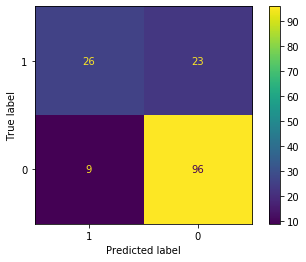

In [6]:
#Evaluation on test data
y_pred = ((X_test@w_old)>0.5).astype(int)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))

# Confusion Matrix
class_labels = dataset['Outcome'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()